In [162]:
!pip install -q luwiji

In [163]:
from luwiji.neural_network import illustration, demo

# PyTorch was meant to be flexible
Jadi tidak ada workflow yang saklak dan dikembalikan ke masing-masing orang

Berikut Workflow yang digunakan untuk kasus standar:
* Siapkan dataset dan dataloader
* Bangun Arsitektur
* Persiapan training -> MCO
* Training loop

# Sample Data

In [164]:
import numpy as np
from sklearn.model_selection import train_test_split

X = np.random.rand(500, 4)
y = np.random.rand(500, 3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 4), (100, 4), (400, 3), (100, 3))

# Step 1: Dataset & Dataloader

In [165]:
import torch
from torch.utils.data import DataLoader, TensorDataset

In [166]:
X_train = torch.FloatTensor(X_train) 
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

In [167]:
train_set = TensorDataset(X_train, y_train)
trainloader = DataLoader(train_set, batch_size=32, shuffle=True)

test_set = TensorDataset(X_test, y_test)
testloader = DataLoader(test_set, batch_size=32)

In [168]:
iterator = iter(trainloader)
iterator._next_data() # 32 data

[tensor([[0.7870, 0.7409, 0.8028, 0.2497],
         [0.2782, 0.6072, 0.5803, 0.4280],
         [0.0730, 0.9790, 0.4372, 0.1260],
         [0.6610, 0.6588, 0.5650, 0.3232],
         [0.3521, 0.9909, 0.9711, 0.8494],
         [0.1323, 0.5380, 0.5876, 0.6451],
         [0.6749, 0.6850, 0.9340, 0.8524],
         [0.1097, 0.4922, 0.4381, 0.9386],
         [0.5664, 0.0183, 0.1974, 0.4720],
         [0.5951, 0.7323, 0.8954, 0.2171],
         [0.6806, 0.6864, 0.4721, 0.7699],
         [0.3063, 0.2305, 0.3591, 0.5074],
         [0.6204, 0.0518, 0.7906, 0.2969],
         [0.7206, 0.1394, 0.7516, 0.4272],
         [0.4127, 0.0836, 0.6643, 0.0672],
         [0.9073, 0.9109, 0.1340, 0.4668],
         [0.2965, 0.6976, 0.8949, 0.8498],
         [0.3153, 0.0528, 0.5387, 0.7873],
         [0.8028, 0.8123, 0.4459, 0.5137],
         [0.8889, 0.7098, 0.3131, 0.6429],
         [0.5911, 0.3345, 0.1335, 0.3357],
         [0.3194, 0.9231, 0.1072, 0.5609],
         [0.7579, 0.4053, 0.6911, 0.8038],
         [0

# Step 2: Bangun Arsitektur

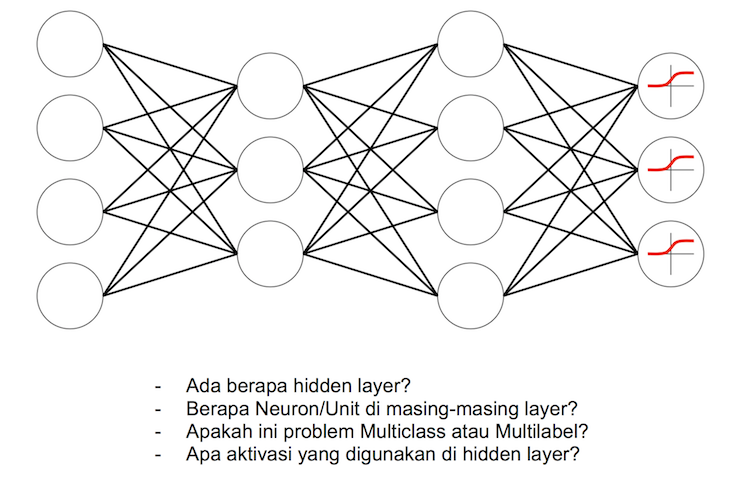

In [169]:
illustration.quiz

In [170]:
from torch import nn

nn.Sequential(
    nn.Linear(4, 3), # 4 input 3 output
    nn.ReLU(), # aktivasi ReLU
    nn.Linear(3, 4), # 3 input 4 output
    nn.ReLU(), # aktivasi ReLU
    nn.Linear(4, 3), # 4 input 3 output
    nn.Sigmoid() # aktivasi Sigmoid
)

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
  (5): Sigmoid()
)

# Step 3: Training Preparation -> MCO

## Model

In [171]:
model = nn.Sequential(
    nn.Linear(4, 3), # 4 input 3 output
    nn.ReLU(), # aktivasi ReLU
    nn.Linear(3, 4), # 3 input 4 output
    nn.ReLU(), # aktivasi ReLU
    nn.Linear(4, 3), # 4 input 3 output
    nn.Sigmoid() # aktivasi Sigmoid
)

## Criterion (Fungsi Penghitung Loss)

In [172]:
# criterion = nn.MSELoss() # model diakhiri Linear -> untuk regresi
# criterion = nn.NLLLoss() # atau disebut juga dengan MCE (Mean Cross Entropy) | model diakhiri logsoftmax -> multiclass clf
criterion = nn.BCELoss() # model diakhiri sigmoid  -> binary clf, multilabel

## Optimizer

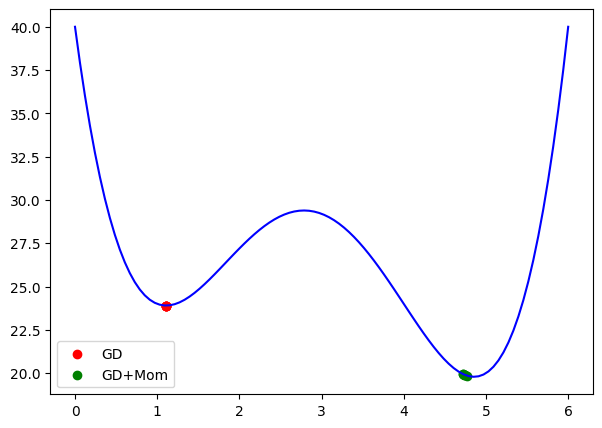

In [173]:
demo.momentum()

 Berikut adaptive optimizer lain yang terkenal:
 * https://www.deeplearning.ai/ai-notes/optimization/index.html
 * https://github.com/Jaewan-Yun/optimizer-visualization

In [174]:
from torch import optim

`Adam + Weight Decay` = AdamW (`Mengurangi overfit` karena memiliki L2 Regularization) 

In [175]:
model

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
  (1): ReLU()
  (2): Linear(in_features=3, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=3, bias=True)
  (5): Sigmoid()
)

In [176]:
optimizer = optim.AdamW(model.parameters(), lr=0.001)

In [177]:
!pip install -q jcopdl

In [178]:
from jcopdl.optim import RAdam, RangerLARS, Ralamb

In [179]:
# optimizer = RangerLARS(model.parameters(), lr=0.001)

# Step 4: Training Loop

In [188]:
epochs = 500
train_cost = []
for i in range(epochs):
    model.train()
    cost = 0
    for feature, target in trainloader:
        output = model(feature) # feedforward
        loss = criterion(output, target) # hitung loss
        loss.backward() # backpropagation
    
        optimizer.step() # update weight
        optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0]
    train_cost.append(cost / len(train_set))
        
    print(f"\rEpoch: {i+1:4}/{epochs:4} | train_cost: {train_cost[-1]:.4f}", end=" ")

Epoch:  500/ 500 | train_cost: 0.6890 

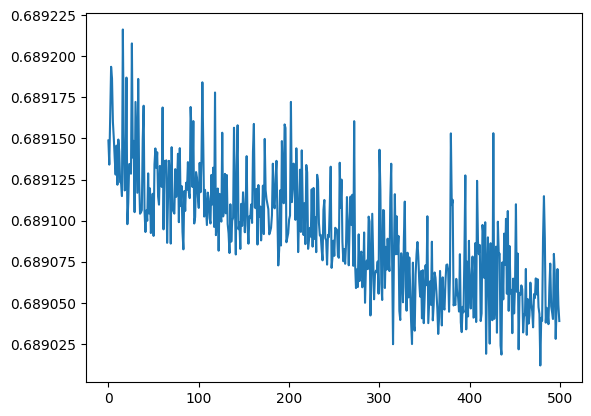

In [189]:
import matplotlib.pyplot as plt

plt.plot(train_cost)